## Исследовательский анализ данных (EDA)

In [1]:
import os
import pathlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [5]:
string_columns = df.dtypes[df.dtypes == "object"].index.tolist()
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


- make - марка автомобиля (BMW, Toyota и т  .д.);
- model — модель автомобиля;
- year — год выпуска автомобиля;
- engine_fuel_type — тип топлива, необходимого двигателю (дизельный, электрический и т  .д.);
- engine_hp — мощность двигателя в лошадиных силах;
- engine_cylinders - количество цилиндров в двигателе;
- transmission_type - тип коробки передач (автоматическая или ручная);
- driven_wheels — привод (передний, задний, полный);
- number_of_doors - количество дверей в автомобиле;
- market_category - премиальный, кроссовер и т  .д.;
- vehicle_size - компактный, средний или большой;
- vehicle_style - седан или кабриолет;
- highway_mpg — миль на галлон (miles per gallon, mpg) на шоссе;
- city_mpg - миль на галлон по городу;
- popularity - количество упоминаний автомобиля в Twitter;
- msrp — рекомендованная производителем розничная цена.

### Анализ целевой переменной

Выясним, что из себя представляет наша целевая переменная (y).

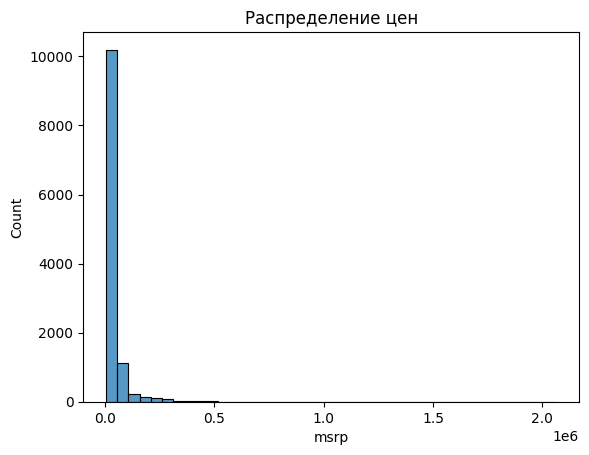

In [7]:
sns.histplot(df["msrp"], bins=40);
plt.title("Распределение цен");

Распределение цен имеет очень длинный "хвост". В левой части много автомобилей с низкими ценами, но их количество быстро уменьшается, после чего остается длинный "хвост" из очень немногих автомобилей с высокими ценами.

Рассмотрим подробнее немного увеличив масштаб и отобрав значения ниже 100000 долларов.

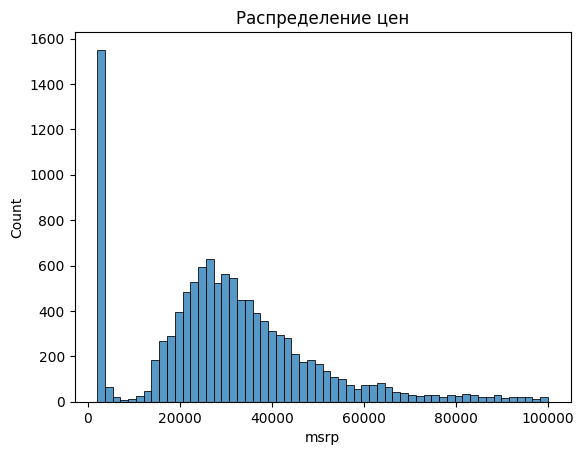

In [8]:
sns.histplot(df[df.msrp < 100_000].msrp)
plt.title("Распределение цен");

Из-за длинного «хвоста» нам довольно сложно увидеть распределение, но еще
большее влияние он оказывает на модель: такое распределение может сильно ее
запутать, что приведет к недостаточно хорошему обучению  .Одним из способов
решения этой проблемы служит логарифмическое преобразование  .Применив
функцию log к ценам, мы устраним этот нежелательный эффект

In [9]:
df["log_msrp"] = np.log1p(df.msrp) # +1 на случай цен равных 0
df = df.drop("msrp", axis=1)

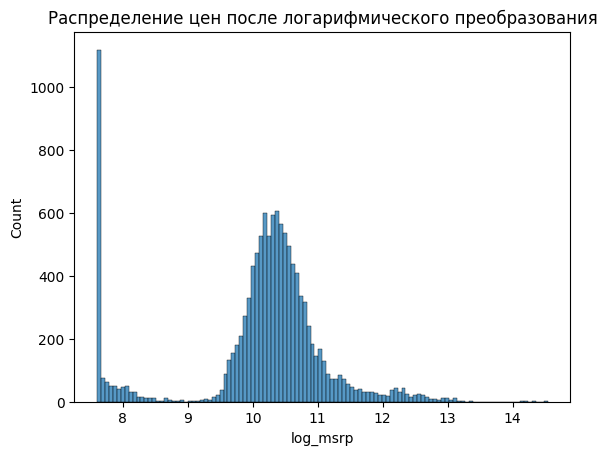

In [10]:
sns.histplot(df.log_msrp)
plt.title("Распределение цен после логарифмического преобразования");

### Проверка на наличие пропущенных значений

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
log_msrp                0
dtype: int64

### Платформа проверки

Разделим данные на train, val и test выборки

In [12]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [13]:
np.random.seed(2)
idx = np.arange(n)

df_shuffled = df.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [14]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,log_msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,10.739349
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,10.612779
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,10.500977
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,10.290483
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,10.448744


## Машинное обучение для регрессии

### Линейная регрессия

Модель линейной регрессии - это функция вида $$ y = g(X) $$
Где y - это наша целевая переменная, а X матрица признаков
Для одной записи модель выглядит так: $$ y_{i} = g(x_{i}) $$
i - номер наблюдения
И если у нас n признаков, то наш вектор $ x_{i} $, является n-мерным, поэтому он содержит n компонентов: $$ y_{i} = g(x_{i}) = g(x_{i1}, x_{i2}, ... x_{in}) = w_0 + x_{i1}w_1 + x_{i2}w_2 + ... + x_{in}w_n$$
- w_0 - составляющая смещения
- w_1, w_2, ..., w_n - веса каждого признака
Формула короче: $$ g(x_{i}) = w_0 + \sum^{n}_{j=1}{x_{ij}w_{j}} $$

In [15]:
# Пример
# xi = list(df_train.iloc[10][["engine_hp", "city_mpg", "popularity"]].values)
xi = np.array([453, 11, 86])
w0 = 7.17
w = [0.01, 0.04, 0.002] # [w1 w2 w3]
n = 3

def linear_regression(xi):
    result = w0 + sum([xi[j] * w[j] for j in range(n)])
    # for j in range(n):
    #     result += xi[j] * w[j]
    return result
linear_regression(xi)

np.float64(12.312000000000001)

In [16]:
np.exp(linear_regression(xi) + 1) # найдем экспоненту от логарифма, что бы вернуть в исходную размерность

np.float64(604405.1317520784)

Т.к. признаки и их веса являются векторами, мы просто можем находить скалярное произведение этих векторов.
$$ x^{T}_{i}w = \sum^{n}_{i=1}{x_{ij}w_{j}} = x_{i1}w_1 + x_{i2}w_2 + ... + x_{in}w_n$$

In [17]:
def linear_regression(xi):
    return w0 + xi.dot(w)
linear_regression(xi)

np.float64(12.312000000000001)

Что бы сделать запись еще короче мы можем добавить $w_0$ в $w$: $$ w = (w_1, w_2, ... w_n, w_0) $$
А в вектор принзаков добавим едининцу: $$ x_i = (x_{i1}, x_{i2}, ..., x_{in}, 1) $$
С помощью этих модификаций мы можем выразить модель как скалярное произведение между новыми векторами: $$ g(x_i) = x^{T}_{i}w $$

In [18]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w = w + [w0]

def linear_regression(xi):
    xi = np.append(xi, 1)
    return xi.dot(w)
    
linear_regression(xi)

np.float64(12.312000000000001)

Когда же мы уже имеем матрицу принаков $X$ то формула линейной регресси превращается в $$ g(X) = w_0 + Xw $$


### Обучающая модель линейной регрессии
До сих пор мы рассматривали прогнозирование. Чтобы иметь возможность это сделат,ь нам нужно знать веса $w$. Как их получить?
Для этого есть несколько способов. Мы используем нормальное уравнение, которое служит самым простым методом реализации. Весовой вектор $w$ может быть вычислен по следующей формуле: $$ w = (X^{T}X)^{-1}X^{T}y$$
- $X^T$ - транспонирование X
- $X^{T}X$ - умножение матрицы транспонированной на матрицу
- $X^{-1}$ - величина обратная X. Для обращение мы можем использовать фунцию np.linalg.inv
  
P.S. Но не  всех матриц есть обратные матрицы, поэтмоу в будущем мы должны использовать метод градиентного спуска.

In [19]:
X = df_train.iloc[:3][["engine_hp", "city_mpg", "popularity"]].values
y = df_train.iloc[:3][["log_msrp"]].values
X

array([[ 335.,   19., 3916.],
       [ 300.,   19., 3916.],
       [ 300.,   20., 3916.]])

In [20]:
def train_linear_regression(X, y):
    # добавление фиктивного стобца
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [21]:
w0, w = train_linear_regression(X, y)
print(f"w0 = {w0}\nw = {w.tolist()}")
y_pred = w0 + X.dot(w)
print(f"y_pred: {y_pred}")

w0 = [8.51754226]
w = [[0.0036162891535977335], [-0.11180172201970251], [0.0025465635533971735]]
y_pred: [[17.57710929]
 [17.45053917]
 [17.33873744]]


### Прогнозирование цены

In [22]:
base = ["engine_hp", "engine_cylinders", "highway_mpg", "city_mpg", "popularity"]
df_num = df_train[base]
df_num.head()

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.0,6.0,26,19,3916
1,300.0,6.0,28,19,3916
2,300.0,6.0,28,20,3916
3,230.0,6.0,28,18,3916
4,230.0,6.0,28,18,3916


In [23]:
# Заполним недостающие значения 0м
df_num = df_num.fillna(0)

Данный способ самый простой и работает довольно хорошо, потому что если признак равен 0, то он наша модель просто проигнорирует значение и оно никак не повлияет на конечный прогноз.

In [24]:
X_train = df_num.values
y_train = df_train.log_msrp.values

In [25]:
w0, w = train_linear_regression(X_train, y_train);
y_pred = w0 + X_train.dot(w);

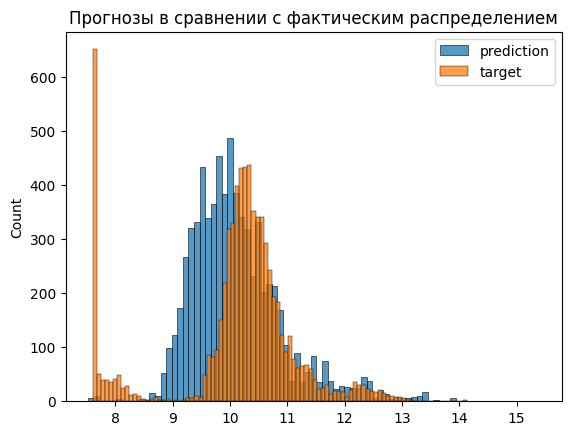

In [26]:
sns.histplot(y_pred, label="prediction");
sns.histplot(y_train, label="target");
plt.legend();
plt.title("Прогнозы в сравнении с фактическим распределением");

### RMSE: оценка качества модели
Просмотр графиков и сравнение распределения фактической целевой переменной с прогнозами - хороший способ оценить качество, но у нас не получится проделывать это каждый раз, когда мы что то меняем в модели. Вместо этого следует использовать метрику, которая количественно определяет качество модели. Существует множество показателей для оценки того, насколько хорошо себя ведет регрессионная модель. Наиболее часто используемым из них является <i>корень среднеквадратичной ошибки</i> - сокращенно **RMSE**.
Она сообщает нам, насколько велики ошибки, допускаемые моделью. $$ RMSE = \sqrt{\frac{1}{m}\sum^{m}_{i=1}{(g({x_{i}) - y_{i}})^{2}}} $$
$ (g(x_{i}) - y_{i})^{2}$ 
Это разница между прогнозом, который мы делаем для наблюдения, и фактическим целевым значением для этого наблюдения.
Квадрат придает гораздо больший вес большим разницам. 

In [27]:
def rmse(y, y_pred):
    error = y - y_pred
    mse = (error**2).mean()
    return np.sqrt(mse)

rmse(y_train, y_pred)

Мы вычислили RMSE на обучающем  наборе. Результат полезен для понимания, но не отражает того, как модель будет использоваться в дальнейшем. Она будет применяться для прогнозирования цен на автомобили, которые раньше не встречала. Для этой уели мы ранее выделили проверочный набор данных. Мы намереенно не ипользуем ее для обучения и сохраняем для проверки модели.

In [28]:
def prepare_Xy(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    y = df.log_msrp.values
    return X, y

In [29]:
X_train, y_train = prepare_Xy(df_train)
w_0, w = train_linear_regression(X_train, y_train)

In [30]:
X_val, y_val = prepare_Xy(df_val)
y_pred = w_0 + X_val.dot(w)
print("validation:", rmse(y_val, y_pred))

validation: 0.7769971249567804


### Feature engeneering

In [31]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df["age"] = 2017 - df.year
    features.append("age")

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [32]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("validation:", rmse(y_val, y_pred))

validation: 0.508359675009697


Text(0.5, 1.0, 'Прогнозы в сравненни с фактическим распределением')

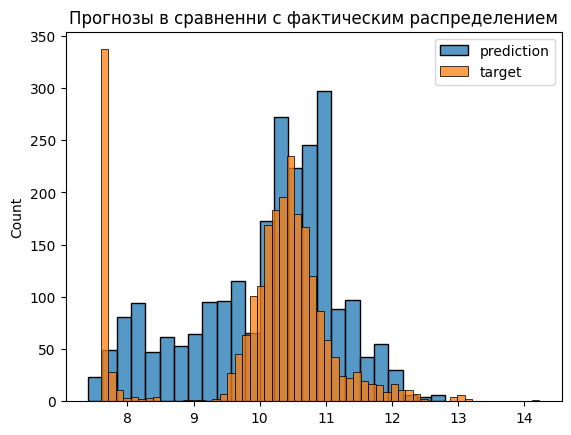

In [35]:
sns.histplot(y_pred, label="prediction")
sns.histplot(y_val, label="target")
plt.legend()
plt.title("Прогнозы в сравненни с фактическим распределением")

### Обработка категориальных признаков

Используем прямое кодирование для категориального признака number_of_doors

In [37]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df["age"] = 2017 - df.year
    features.append("age")

    for v in [2, 3, 4]:
        feature = f"num_doors_{v}"
        value = (df["number_of_doors"] == v).astype(int)
        df[feature] = value
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [43]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("validation:", rmse(y_val, y_pred))

validation: 0.5126647698251209


Text(0.5, 1.0, 'Прогнозы в сравненни с фактическим распределением')

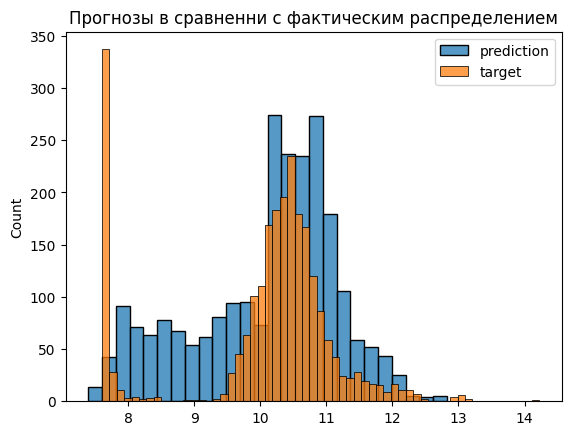

In [44]:
sns.histplot(y_pred, label="prediction")
sns.histplot(y_val, label="target")
plt.legend()
plt.title("Прогнозы в сравненни с фактическим распределением")

In [47]:
makes = df["make"].value_counts().head().index

In [48]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df["age"] = 2017 - df.year
    features.append("age")

    for v in [2, 3, 4]:
        feature = f"num_doors_{v}"
        value = (df["number_of_doors"] == v).astype(int)
        df[feature] = value
        features.append(feature)

    for make in makes:
        feature = f"is_make_{make}"
        df[feature] = (df["make"] == make).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [49]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("validation:", rmse(y_val, y_pred))

validation: 0.515375904831236


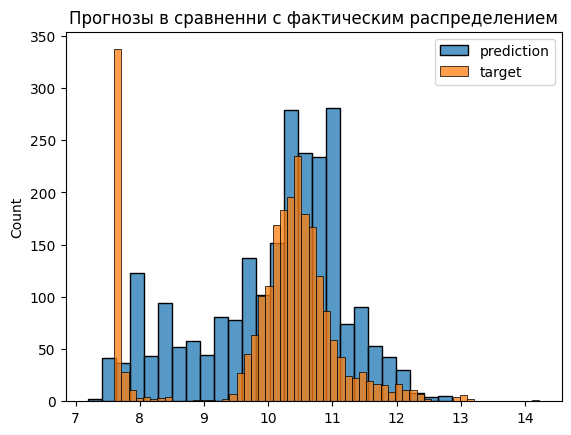

In [51]:
sns.histplot(y_pred, label="prediction")
sns.histplot(y_val, label="target")
plt.legend()
plt.title("Прогнозы в сравненни с фактическим распределением");

### Регуляризация
Добавление новых признаков не всегда помогает, иногда даже ухудшает. Причиной такого поведения служит неустойчивость численного решения.

Регуляризация является важной концепцией МО и означает контроль над весами модели, обеспечивая их должное поведение и не позволяя им слишком увеличиваться, как произошло в нашем случае.
Один из способов выаолнить регуляризацию - добавить небольшое число к каждому диагональному элементу матрицы. Тогда мы получаем следующую формулу для линейной регрессии: $$ w = (X^{T}X+\alpha I)^{-1}X^{T}y $$

Рассмотрим ту часть, которая изменилась: матрицу, которую нам нужно обратить. Вот как она выглядит: $$ X^{T}X + \alpha I $$
Эта формула говорит, что нам нужна $I$ - едининчная матрица, которая представляет собой матрицу с единицами на главной диагонали и нулями в остальных случаях. Мы умножаем эту единичню матрицу на число $\alpha$. Таким образом, все значения, находящиеся в диагонали $I$, становятся $\alpha$. Затем мы суммируем $\alpha I$ и $X^{T}X$, что добавляет $\alpha$ ко всем диагональным элементам $X^{T}X$.

In [57]:
XTX = X_train.T.dot(X_train)
XTX = XTX * 0.01 * np.eye(XTX.shape[0])

Создадим новую функцию, которая использует эту идею и реализует линейную регрессию с регуляризацией.

In [70]:
def train_linear_regression_reg(X: pd.DataFrame, y: pd.Series, r=0.0):
    '''функция линейной регрессии с регуляризацией'''
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [71]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print(f"{r},\t {w_0:.2f}, {w[6]:.2f}, {w[13]:.2f}")

0,	 10.59, -1.21, -0.24
0.001,	 10.59, -1.21, -0.24
0.01,	 10.56, -1.19, -0.24
0.1,	 10.33, -0.97, -0.24
1,	 8.96, 0.30, -0.24
10,	 6.85, 1.88, -0.22


In [77]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.1)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print("validation:", rmse(y_val, y_pred))

validation: 0.5155517525655918


### Использование модели

In [78]:
ad = {
'city_mpg': 18,
'driven_wheels': 'all_wheel_drive',
'engine_cylinders': 6.0,
'engine_fuel_type': 'regular_unleaded',
'engine_hp': 268.0,
'highway_mpg': 25,
'make': 'toyota',
'market_category': 'crossover,performance',
'model': 'venza',
'number_of_doors': 4.0,
'popularity': 2031,
'transmission_type': 'automatic',
'vehicle_size': 'midsize',
'vehicle_style': 'wagon',
'year': 2013
}

In [79]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

In [84]:
y_pred = w_0 + X_test.dot(w)
y_pred

array([10.51265142])

In [85]:
suggestion = np.expm1(y_pred)
suggestion

array([36776.86412728])